<a href="https://colab.research.google.com/github/wilsonfmjr/PPGEEC2321---REDES-NEURAIS-E-DEEP-LEARNING/blob/main/Questao_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ================================
# 1. Instalar dependência
# ================================
!pip install minisom --quiet

  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from minisom import MiniSom
from google.colab import files
from collections import defaultdict
from matplotlib import cm

In [ ]:
# ================================
# 3. Carregar o arquivo
# ================================

# Caminho da pasta com o dataFrame
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/My Drive/Dataset3/Dados_Q5.xlsx", sheet_name="Planilha1")

# Exibe as primeiras linhas do DataFrame
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Países  Expectativa de\nVida  Educação   PIB  Estabilidade\nPolítica
0           UK                  0.88      0.99  0.91                    1.10
1    Austrália                  0.90      0.99  0.93                    1.26
2       Canadá                  0.90      0.98  0.94                    1.24
3          EUA                  0.87      0.98  0.97                    1.18
4        Japão                  0.93      0.93  0.93                    1.20
5       França                  0.89      0.97  0.92                    1.04
6    Cingapura                  0.88      0.87  0.91                    1.41
7    Argentina                  0.81      0.92  0.80                    0.55
8      Uruguai                  0.82      0.92  0.75                    1.05
9         Cuba                  0.85      0.90  0.64                    0.07
10    Colômbia          


Total de clusters formados: 10

Cluster 0: Serra Leoa, Angola, Etiópia, Moçambique
Cluster 1: Colômbia, Paraguai
Cluster 2: Egito
Cluster 3: Cuba, Brasil
Cluster 4: Senegal
Cluster 5: Argentina
Cluster 6: Nigéria
Cluster 7: Uruguai, China
Cluster 8: Cingapura
Cluster 9: UK, Austrália, Canadá, EUA, Japão, França


/tmp/ipython-input-128-2604429269.py:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cluster_colors = cm.get_cmap('tab20', num_clusters)


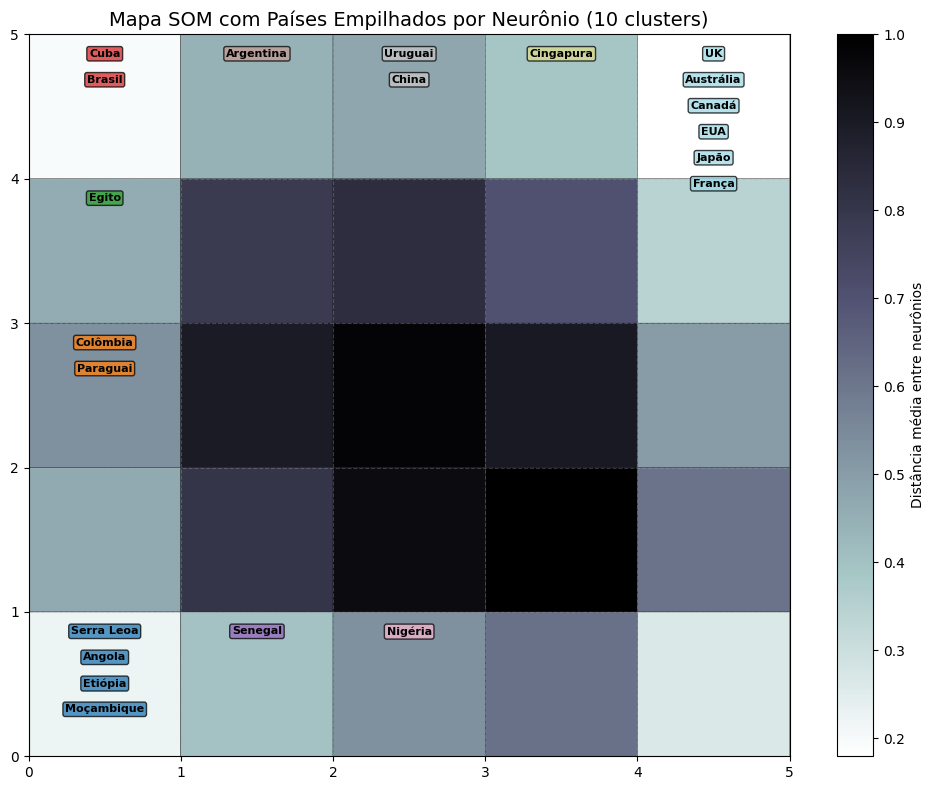

In [ ]:
# ================================
# 4. Preparar os dados
# ================================
df.columns = df.columns.str.replace('\n', ' ')
features = df.columns[1:]
X = df[features].values

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ================================
# 5. Treinar o SOM
# ================================
som_shape = (5, 5)  # Tamanho da grade SOM (pode ajustar)
#som = MiniSom(som_shape[0], som_shape[1], X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
#som = MiniSom(som_shape[0], som_shape[1], X_scaled.shape[1], sigma=3.0, learning_rate=0.5, neighborhood_function='gaussian', random_seed=42)
som = MiniSom(som_shape[0], som_shape[1], X_scaled.shape[1], sigma=5.0, learning_rate=0.05, random_seed=42)
som.random_weights_init(X_scaled)
som.train(X_scaled, 1000)

# ================================
# 6. Clusterização automática via SOM (sem número fixo)
# ================================
# Cada neurônio ativado será considerado um cluster
winners = np.array([som.winner(x) for x in X_scaled])
df['BMU_X'] = winners[:, 0]
df['BMU_Y'] = winners[:, 1]

# Criar identificador único para cada neurônio ativado
bmu_coords = df[['BMU_X', 'BMU_Y']].apply(tuple, axis=1)
unique_bmus = {coord: i for i, coord in enumerate(sorted(set(bmu_coords)))}
df['Cluster'] = bmu_coords.map(unique_bmus)

num_clusters = df['Cluster'].nunique()
print(f"\nTotal de clusters formados: {num_clusters}\n")

# Mostrar países por cluster
for cid in sorted(df['Cluster'].unique()):
    membros = df[df['Cluster'] == cid]['Países'].tolist()
    print(f"Cluster {cid}: {', '.join(membros)}")

# ================================
# 7. Visualização SOM com nomes empilhados por neurônio
# ================================
plt.figure(figsize=(10, 8))
u_matrix = som.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r', edgecolors='k')
plt.colorbar(label='Distância média entre neurônios')

# Agrupar países por neurônio
neuron_dict = defaultdict(list)
for i, x in enumerate(X_scaled):
    coord = som.winner(x)
    pais = df.loc[i, 'Países']
    cluster_id = df.loc[i, 'Cluster']
    neuron_dict[coord].append((pais, cluster_id))

# Gerar cores automáticas para número dinâmico de clusters
cluster_colors = cm.get_cmap('tab20', num_clusters)
line_spacing = 0.18

# Escrever países empilhados em cada neurônio
for (x, y), countries in neuron_dict.items():
    for i, (pais, cluster_id) in enumerate(countries):
        plt.text(x + 0.5, y + 0.9 - i * line_spacing, pais,
                 fontsize=8, ha='center', va='top',
                 bbox=dict(facecolor=cluster_colors(cluster_id),
                           alpha=0.75, boxstyle='round,pad=0.2'),
                 color='black', weight='bold')

plt.title(f"Mapa SOM com Países Empilhados por Neurônio ({num_clusters} clusters)", fontsize=14)
plt.xticks(np.arange(som_shape[0]+1))
plt.yticks(np.arange(som_shape[1]+1))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



Total de clusters formados: 6

Cluster 0: Nigéria, Senegal, Serra Leoa, Angola, Etiópia, Moçambique
Cluster 1: Paraguai
Cluster 2: Colômbia
Cluster 3: Brasil, Egito
Cluster 4: UK, Austrália, Canadá, EUA, Japão, França, Cingapura, Argentina, Uruguai, Cuba
Cluster 5: China


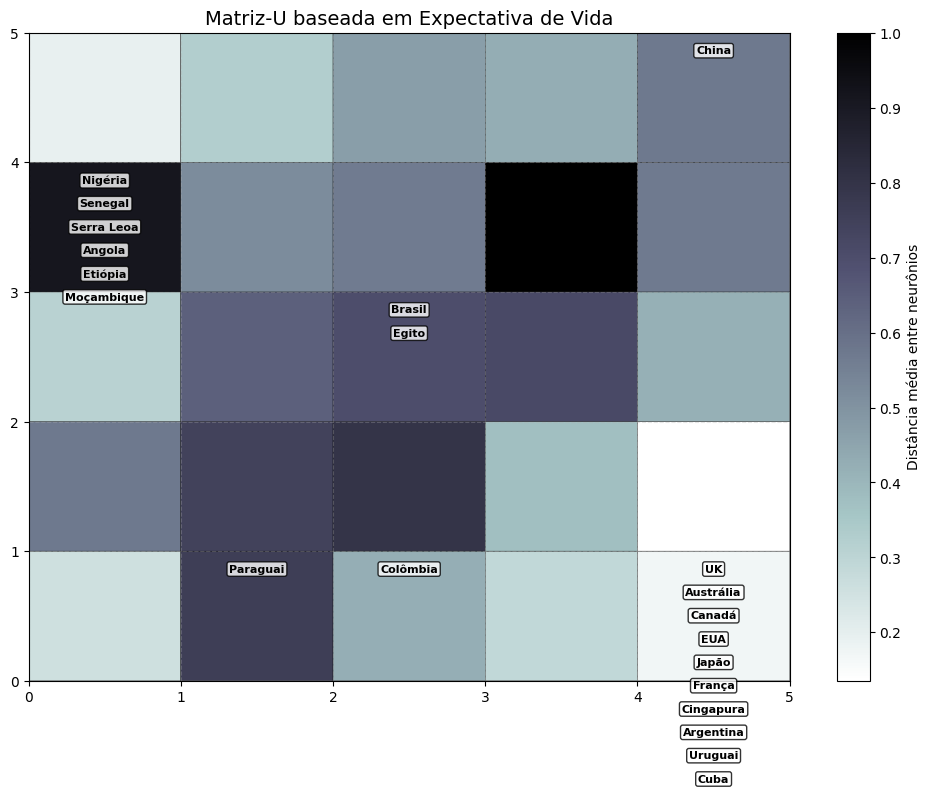


Total de clusters formados: 7

Cluster 0: Nigéria
Cluster 1: Senegal, Serra Leoa, Angola, Etiópia, Moçambique
Cluster 2: Egito
Cluster 3: Brasil
Cluster 4: China
Cluster 5: Colômbia, Paraguai
Cluster 6: UK, Austrália, Canadá, EUA, Japão, França, Cingapura, Argentina, Uruguai, Cuba


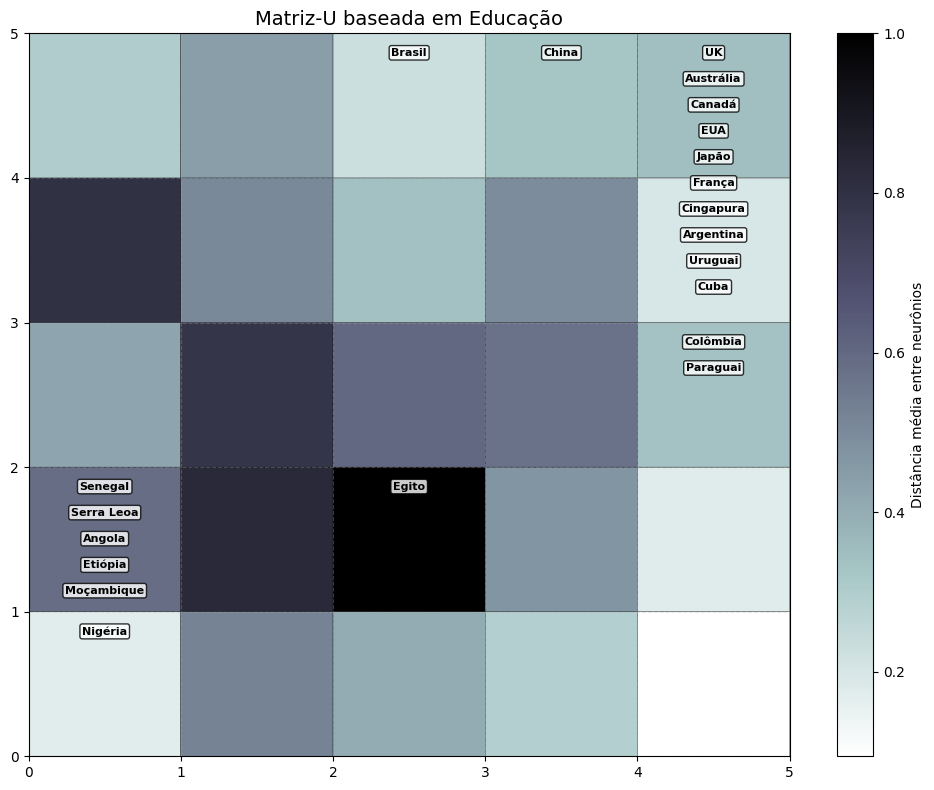


Total de clusters formados: 9

Cluster 0: Nigéria, Senegal, Serra Leoa, Angola, Etiópia, Moçambique
Cluster 1: Paraguai
Cluster 2: Egito
Cluster 3: Uruguai
Cluster 4: Cuba
Cluster 5: Brasil
Cluster 6: Colômbia
Cluster 7: Argentina
Cluster 8: UK, Austrália, Canadá, EUA, Japão, França, Cingapura, China


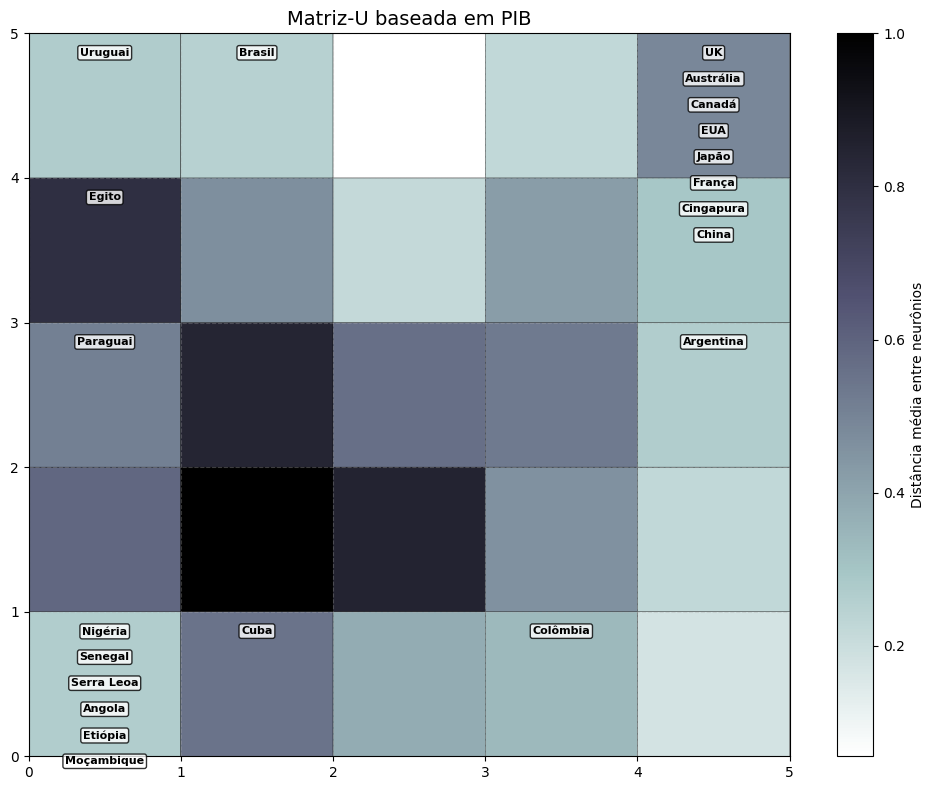


Total de clusters formados: 7

Cluster 0: Cuba
Cluster 1: Brasil
Cluster 2: Egito, Moçambique
Cluster 3: Colômbia, Paraguai, Nigéria, Senegal, Serra Leoa, Angola
Cluster 4: Argentina
Cluster 5: Etiópia
Cluster 6: UK, Austrália, Canadá, EUA, Japão, França, Cingapura, Uruguai, China


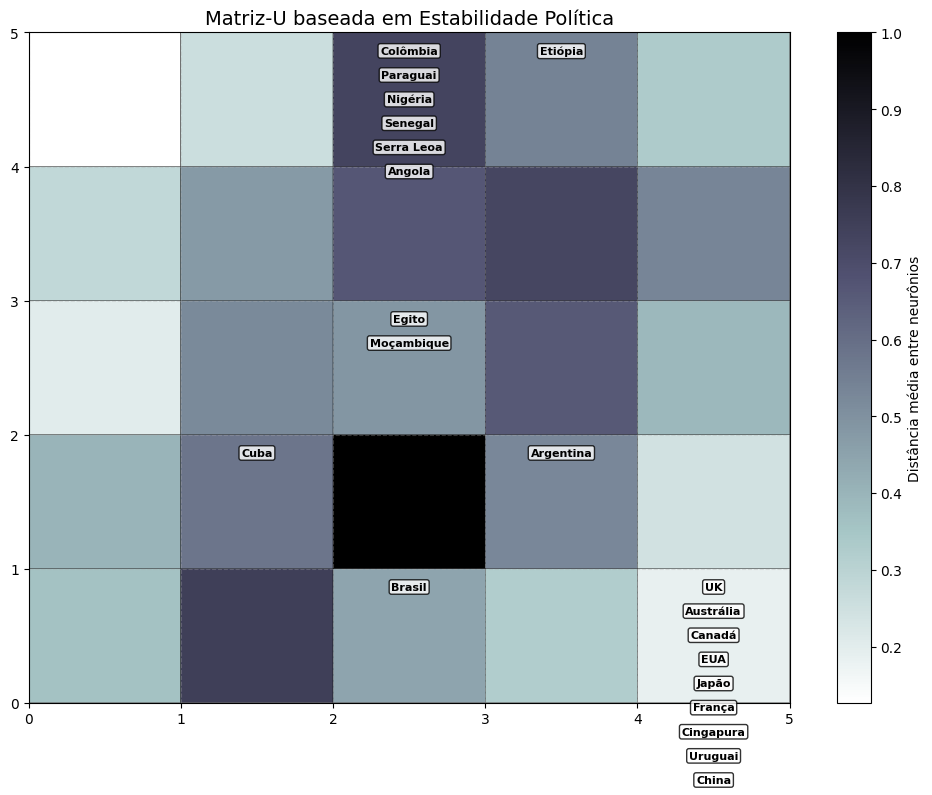

In [ ]:
# Corrigir nomes de colunas
df.columns = df.columns.str.replace('\n', ' ')
variaveis = ['Expectativa de Vida', 'Educação', 'PIB', 'Estabilidade Política']

# ================================
# 4. Funções para treinar SOM e plotar U-Matrix
# ================================
def treinar_som_variavel(df, nome_variavel, som_shape=(5, 5)):
    X = df[[nome_variavel]].values
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    som = MiniSom(som_shape[0], som_shape[1], input_len=1, sigma=5.0, learning_rate=0.005, random_seed=42)
    som.random_weights_init(X_scaled)
    som.train(X_scaled, 1000)

    # Vencedores (BMUs)
    winners = np.array([som.winner(x) for x in X_scaled])
    df_temp = df.copy()
    df_temp['BMU_X'] = winners[:, 0]
    df_temp['BMU_Y'] = winners[:, 1]

    # Criar identificador único para cada neurônio ativado
    bmu_coords = df_temp[['BMU_X', 'BMU_Y']].apply(tuple, axis=1)
    unique_bmus = {coord: i for i, coord in enumerate(sorted(set(bmu_coords)))}
    df_temp['Cluster'] = bmu_coords.map(unique_bmus)

    num_clusters = df_temp['Cluster'].nunique()
    print(f"\nTotal de clusters formados: {num_clusters}\n")

    # Mostrar países por cluster
    for cid in sorted(df_temp['Cluster'].unique()):
        membros = df_temp[df_temp['Cluster'] == cid]['Países'].tolist()
        print(f"Cluster {cid}: {', '.join(membros)}")

    return som, X_scaled, df_temp

def plotar_matriz_u(som, X_scaled, df_temp, titulo):
    u_matrix = som.distance_map().T
    som_shape = u_matrix.shape

    plt.figure(figsize=(10, 8))
    plt.pcolor(u_matrix, cmap='bone_r', edgecolors='k')
    plt.colorbar(label='Distância média entre neurônios')

    neuron_dict = defaultdict(list)
    for i, x in enumerate(X_scaled):
        coord = som.winner(x)
        pais = df_temp.loc[i, 'Países']
        neuron_dict[coord].append(pais)

    line_spacing = 0.18
    for (x, y), countries in neuron_dict.items():
        for i, pais in enumerate(countries):
            plt.text(x + 0.5, y + 0.9 - i * line_spacing, pais,
                     fontsize=8, ha='center', va='top',
                     bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.2'),
                     color='black', weight='bold')

    plt.title(titulo, fontsize=14)
    plt.xticks(np.arange(som_shape[0]+1))
    plt.yticks(np.arange(som_shape[1]+1))
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# ================================
# 5. Gerar 4 SOMs (um por variável)
# ================================
for var in variaveis:
    som, X_scaled, df_temp = treinar_som_variavel(df, var)
    plotar_matriz_u(som, X_scaled, df_temp, f'Matriz-U baseada em {var}')
